# Sentiment Analysis Using Various ML Classifiers ans well as using Recurrent Neural Network

# Importing libraries <a id="1"></a>

In [1]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset <a id="2"></a>

In [2]:
# Construct a tf.data.Dataset
data = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [3]:
data = data.sample(frac=1)
data = data[:200000]

# Data Visualization <a id="3"></a>

In [4]:
print("Dataset shape:", data.shape)

Dataset shape: (200000, 6)


In [5]:
data.head(10)

,polarity,id,date,query,user,text
1228004,4,1991101793,Mon Jun 01 06:24:22 PDT 2009,NO_QUERY,rbertozo,Estou no Twitter.
755802,0,2288451282,Mon Jun 22 19:10:43 PDT 2009,NO_QUERY,thatgirllexi,Sleepover with my bestie. ...It's the last one...
126221,0,1834473315,Mon May 18 03:04:15 PDT 2009,NO_QUERY,omegacds,rocked!!!! I now have a leaky shower though.
195138,0,1970438461,Sat May 30 03:52:13 PDT 2009,NO_QUERY,jagalubnan,"@jigitz if i were in dublin, totally would bu..."
660700,0,2242805572,Fri Jun 19 12:39:13 PDT 2009,NO_QUERY,matthimrod,@frommster You went without me?
367847,0,2049326998,Fri Jun 05 16:41:14 PDT 2009,NO_QUERY,babyblackbear,@Dog_Crazy That's sad!
94063,0,1770919367,Mon May 11 22:37:36 PDT 2009,NO_QUERY,smilinglexi,Aahhh.had a bad case of the Mondays glad it's...
434150,0,2065120466,Sun Jun 07 07:56:18 PDT 2009,NO_QUERY,nadinemullin,i'm over tied and cant sleep
1072076,4,1966484837,Fri May 29 17:51:12 PDT 2009,NO_QUERY,EDouglasWW,@ManMadeMoon Congrats on the write-up in Rolli...
123098,0,1833845546,Mon May 18 00:39:52 PDT 2009,NO_QUERY,Nsyncer81,I thought I Lost him ...Its the worst feeling...


In [6]:
data['polarity'].unique()

array([4, 0])

In [7]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
1228004,1,1991101793,Mon Jun 01 06:24:22 PDT 2009,NO_QUERY,rbertozo,Estou no Twitter.
755802,0,2288451282,Mon Jun 22 19:10:43 PDT 2009,NO_QUERY,thatgirllexi,Sleepover with my bestie. ...It's the last one...
126221,0,1834473315,Mon May 18 03:04:15 PDT 2009,NO_QUERY,omegacds,rocked!!!! I now have a leaky shower though.
195138,0,1970438461,Sat May 30 03:52:13 PDT 2009,NO_QUERY,jagalubnan,"@jigitz if i were in dublin, totally would bu..."
660700,0,2242805572,Fri Jun 19 12:39:13 PDT 2009,NO_QUERY,matthimrod,@frommster You went without me?


In [8]:
data.describe()

,polarity,id
count,200000.000000,2.000000e+05
mean,0.498225,1.999665e+09
std,0.499998,1.934366e+08
min,0.000000,1.467811e+09
25%,0.000000,1.957041e+09
50%,0.000000,2.002267e+09
75%,1.000000,2.177365e+09
max,1.000000,2.329204e+09


In [9]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  99645
No. of negative tagged sentences is: 100355


In [10]:
# get a word count per of text
def word_count(words):
    return len(words.split())

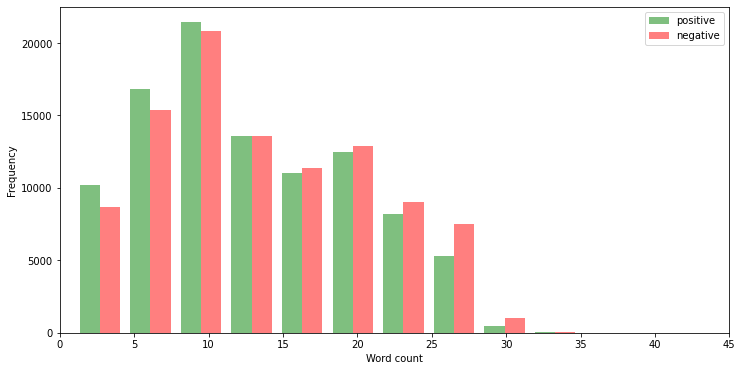

In [11]:
# plot word count distribution for both positive and negative 

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [12]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 64512),
 ('and', 36950),
 ('you', 29856),
 ('for', 26587),
 ('have', 18073),
 ('that', 16075),
 ("i'm", 15882),
 ('just', 15443),
 ('but', 15436),
 ('with', 14185),
 ('not', 12807),
 ('was', 12765),
 ('this', 11046),
 ('get', 10117),
 ('good', 9741),
 ('are', 9652),
 ('like', 9415),
 ('all', 9325),
 ('out', 8676),
 ('your', 8139)]

# Data Processing <a id="4"></a>

<AxesSubplot:xlabel='polarity', ylabel='count'>

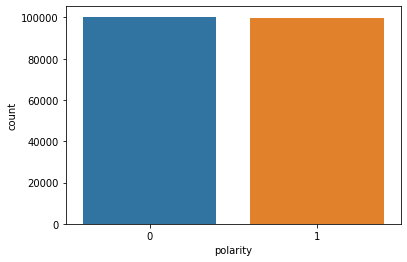

In [13]:
%matplotlib inline
sns.countplot(data['polarity'])

In [14]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [15]:
data.drop('id', axis=1, inplace=True)

In [16]:
data.head(10)

,polarity,text
1228004,1,Estou no Twitter.
755802,0,Sleepover with my bestie. ...It's the last one...
126221,0,rocked!!!! I now have a leaky shower though.
195138,0,"@jigitz if i were in dublin, totally would bu..."
660700,0,@frommster You went without me?
367847,0,@Dog_Crazy That's sad!
94063,0,Aahhh.had a bad case of the Mondays glad it's...
434150,0,i'm over tied and cant sleep
1072076,1,@ManMadeMoon Congrats on the write-up in Rolli...
123098,0,I thought I Lost him ...Its the worst feeling...


In [17]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [20]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [21]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
{'ll', 'doesn', 'myself', 'no', 'be', "shan't", 'further', "it's", 'm', 've', 'ourselves', 'haven', 'yours', 'once', 'through', 'down', 'shan', 'y', 'you', 'does', "couldn't", 'off', 'other', 'nor', 're', 'but', "aren't", 'during', 'only', "you're", 'whom', 'ain', "you've", 'own', 'into', 'she', 'while', 'our', 'ours', 'with', "you'll", 'theirs', 'because', 'then', 'don', 'if', 'himself', 'hadn', "isn't", 'under', 'again', 'up', 'both', 'having', "wouldn't", 'has', 'at', 'not', 'before', 'so', 'who', 'can', 'did', "weren't", 'isn', 'than', 'o', 'wouldn', "shouldn't", "mustn't", 'these', 'now', "doesn't", 'him', 'how', 'i', 'by', 'have', 'herself', 'shouldn', 'd', 'the', "wasn't", 'over', 'as', "didn't", 'doing', 'where', 'do', "you'd", 'didn', 'had', 'until', 'yourselves', 'some', "won't", 'of', 'they', 'to', 'more', 'those', 'themselves', 'against', 'am', "haven't", 'fe

In [22]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

> The Preprocessing steps taken are:

* Lower Casing: Each text is converted to lowercase.
* Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

* Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")
* Removing Short Words: Words with length less than 2 are removed.
* Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
* Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [23]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [24]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [25]:
data.head(10)

,polarity,text,processed_tweets
1228004,1,Estou no Twitter.,stou twitter
755802,0,Sleepover with my bestie. ...It's the last one...,leepover bestie last one leaf college sad
126221,0,rocked!!!! I now have a leaky shower though.,ocked leaky shower though
195138,0,"@jigitz if i were in dublin, totally would bu...",jigitz dublin totally would check site hostel ...
660700,0,@frommster You went without me?,frommster went without
367847,0,@Dog_Crazy That's sad!,dogcrazy thats sad
94063,0,Aahhh.had a bad case of the Mondays glad it's...,ahhhhad bad case monday glad overnow could get...
434150,0,i'm over tied and cant sleep,tied cant sleep
1072076,1,@ManMadeMoon Congrats on the write-up in Rolli...,manmademoon congrats writeup rolling stone ano...
123098,0,I thought I Lost him ...Its the worst feeling...,thought lost worst feeling world watching some...


# Analyzing the data <a id="5"></a>

### Word-Cloud for Negative tweets.

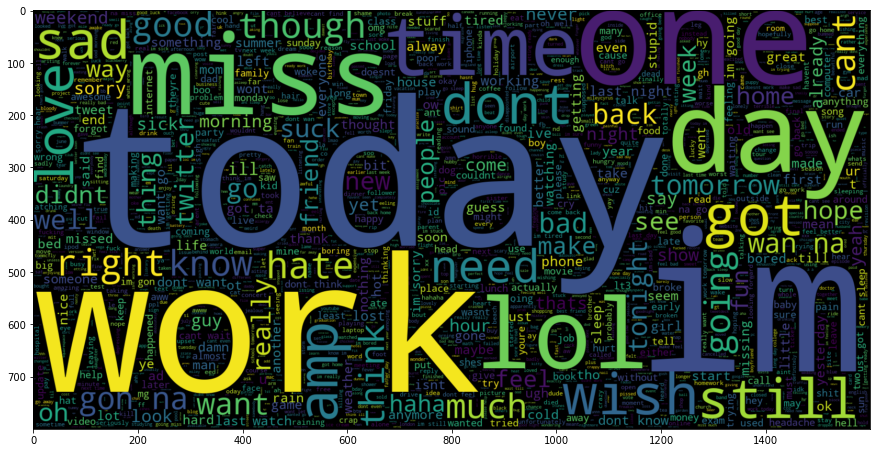

In [26]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

### Word-Cloud for Positive tweets.

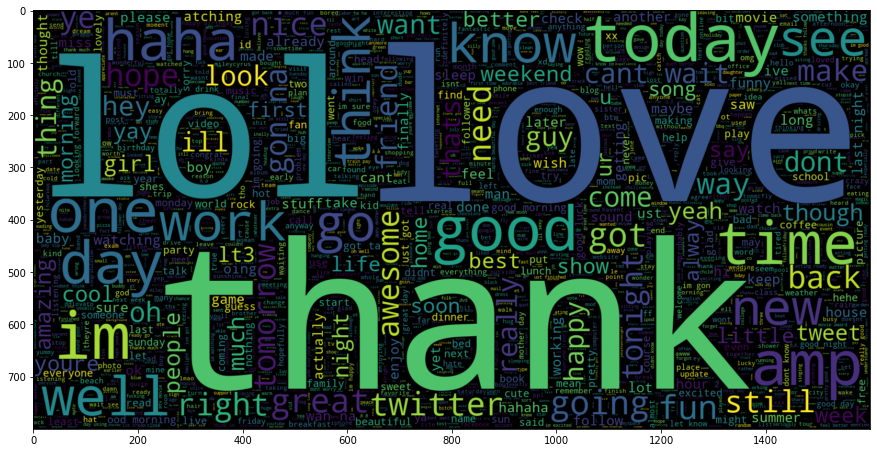

In [27]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

## Vectorization and Splitting the data <a id="6"></a>
Storing input variable-processes_tweets to X and output variable-polarity to y

In [28]:
X = data['processed_tweets'].values
y = data['polarity'].values


In [29]:
print(X.shape)
print(y.shape)

(200000,)
(200000,)


## Convert text to word frequency vectors
### TF-IDF
 This is an acronym than stands for **Term Frequency – Inverse Document** Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.
* Inverse Document Frequency: This downscales words that appear a lot across documents.

In [30]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  170195


In [31]:
print(X.shape)
print(y.shape)

(200000, 170195)
(200000,)


## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.




In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [33]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 170195)
y_train (160000,)

X_test (40000, 170195)
y_test (40000,)


# Model Building <a id="7"></a>

### Model evaluating function

In [34]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Logistic Regression <a id="8"></a>

Accuracy of model on training data : 83.50625000000001
Accuracy of model on testing data : 77.4975 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     20036
           1       0.76      0.80      0.78     19964

    accuracy                           0.77     40000
   macro avg       0.78      0.78      0.77     40000
weighted avg       0.78      0.77      0.77     40000



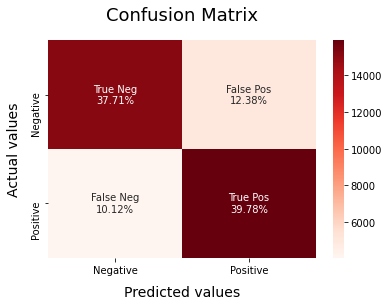

In [35]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

### Linear SVM <a id="9"></a>

Accuracy of model on training data : 92.9975
Accuracy of model on testing data : 76.315 

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     20036
           1       0.76      0.78      0.77     19964

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



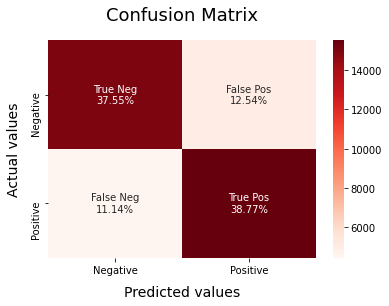

In [36]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

### Random Forest <a id="10"></a>

Accuracy of model on training data : 75.68249999999999
Accuracy of model on testing data : 71.3275 

              precision    recall  f1-score   support

           0       0.74      0.66      0.70     20036
           1       0.69      0.77      0.73     19964

    accuracy                           0.71     40000
   macro avg       0.72      0.71      0.71     40000
weighted avg       0.72      0.71      0.71     40000



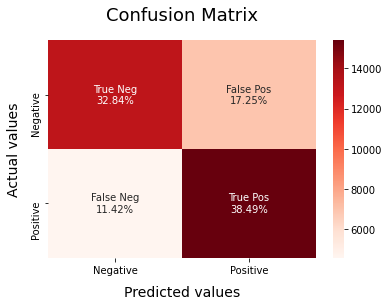

In [37]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

### Naive Bayes <a id="11"></a>

Accuracy of model on training data : 86.753125
Accuracy of model on testing data : 76.4175 

              precision    recall  f1-score   support

           0       0.75      0.79      0.77     20036
           1       0.78      0.74      0.76     19964

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



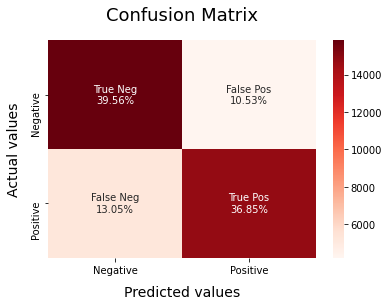

In [38]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

# RNN <a id="12"></a>

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import re

In [40]:
import keras
keras.__version__

'2.4.3'

In [41]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.processed_tweets)
sequences = tokenizer.texts_to_sequences(data.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...    0    0   42]
 [   0    0    0 ... 1586  688   54]
 [   0    0    0 ...    0  482   62]
 ...
 [   0    0    0 ...  769  595   58]
 [   0    0    0 ...  310   92   30]
 [   0    0    0 ...   41   80  285]]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

In [43]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/10
5000/5000 [==============================] - 586s 117ms/step - loss: 0.5387 - accuracy: 0.7213 - val_loss: 0.4759 - val_accuracy: 0.7727

Epoch 00001: val_accuracy improved from -inf to 0.77272, saving model to rnn_model.hdf5
Epoch 2/10
5000/5000 [==============================] - 591s 118ms/step - loss: 0.4651 - accuracy: 0.7780 - val_loss: 0.4720 - val_accuracy: 0.7742

Epoch 00002: val_accuracy improved from 0.77272 to 0.77417, saving model to rnn_model.hdf5
Epoch 3/10
5000/5000 [==============================] - 596s 119ms/step - loss: 0.4485 - accuracy: 0.7870 - val_loss: 0.4718 - val_accuracy: 0.7756

Epoch 00003: val_accuracy improved from 0.77417 to 0.77555, saving model to rnn_model.hdf5
Epoch 4/10
5000/5000 [==============================] - 587s 117ms/step - loss: 0.4353 - accuracy: 0.7935 - val_loss: 0.4704 - val_accuracy: 0.7778

Epoch 00004: val_accuracy improved from 0.77555 to 0.77782, saving model to rnn_model.hdf5
Epoch 5/10
5000/5000 [=====================

In [54]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 76.64%


In [45]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')
# print(pred)

Negative


In [46]:
model = keras.models.load_model('rnn_model.hdf5')
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

Positive


In [47]:
sequence = tokenizer.texts_to_sequences(['I had a bad day at work.'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

Negative


# Model Saving, Loading and Prediction <a id="13"></a>

In [48]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle','wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

### Predict using saved model

In [49]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [50]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [51]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()
    
    # Text to classify should be in a list.
    text = ["I love machine learning",
            "Work is too hectic.",
            "Mr.Sharama, I feel so good"]
    
    df = predict(vectoriser, lg, text)
    print(df.head())


                         text sentiment
0     I love machine learning  Positive
1         Work is too hectic.  Negative
2  Mr.Sharama, I feel so good  Positive
